<a href="https://colab.research.google.com/github/Marchbreeze/Edu-Public-Data/blob/main/corr_elementary_school.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 고등학교 5개년 데이터 통합
import pandas as pd

file_paths = [
    'paps_elementaryschool_2024.csv',
    'paps_elementaryschool_2023.csv',
    'paps_elementaryschool_2022.csv',
    'paps_elementaryschool_2021.csv',
    'paps_elementaryschool_2020.csv'
]

dataframes = [pd.read_csv(file_path) for file_path in file_paths]
df = pd.concat(dataframes, ignore_index=True)
df

,시도교육청,교육지원청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,학년,...,%,인원.1,%.1,인원.2,%.2,인원.3,%.3,인원.4,%.4,검사인원수
0,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 서초구,S000003511,서울교육대학교부설초등학교,2,국립,N,NaN,5학년,...,3.9,17.0,33.3,31.0,60.8,1.0,2.0,0.0,0.0,51.0
1,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 서초구,S000003511,서울교육대학교부설초등학교,2,국립,N,NaN,5학년,...,14.0,29.0,50.9,18.0,31.6,2.0,3.5,0.0,0.0,57.0
2,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 서초구,S000003511,서울교육대학교부설초등학교,2,국립,N,NaN,6학년,...,5.7,24.0,45.3,20.0,37.7,6.0,11.3,0.0,0.0,53.0
3,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 서초구,S000003511,서울교육대학교부설초등학교,2,국립,N,NaN,6학년,...,5.7,38.0,71.7,8.0,15.1,4.0,7.5,0.0,0.0,53.0
4,서울특별시교육청,서울특별시중부교육지원청,서울특별시 종로구,S000003563,서울대학교사범대학부설초등학교,2,국립,N,NaN,5학년,...,7.5,17.0,32.1,22.0,41.5,9.0,17.0,1.0,1.9,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111680,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000837,삼화초등학교,2,공립,N,NaN,6학년,...,13.1,34.0,55.7,19.0,31.1,0.0,0.0,0.0,0.0,61.0
111681,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000839,하귀일초등학교,2,공립,N,NaN,5학년,...,2.0,27.0,52.9,20.0,39.2,3.0,5.9,0.0,0.0,51.0
111682,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000839,하귀일초등학교,2,공립,N,NaN,5학년,...,15.2,19.0,57.6,9.0,27.3,0.0,0.0,0.0,0.0,33.0
111683,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000839,하귀일초등학교,2,공립,N,NaN,6학년,...,11.4,22.0,50.0,15.0,34.1,2.0,4.5,0.0,0.0,44.0


In [13]:
# column명 확인
df.columns

Index(['시도교육청', '교육지원청', '지역', '정보공시 학교코드', '학교명', '학교급코드', '설립구분', '제외여부',
       '제외사유', '학년', '성별', '왕복오래달리기(회)', '오래달리기걷기(초)', '스텝검사(PEI)',
       '앉아윗몸앞으로굽히기(cm)', '종합유연성(점)', '(무릎대고)팔굽혀펴기(회)', '윗몸말아올리기(회)', '악력(kg)',
       '50m달리기(초)', '제자리멀리뛰기(cm)', 'BMI(kg/㎡)', '체지방률(%fat)', '인원', '%',
       '인원.1', '%.1', '인원.2', '%.2', '인원.3', '%.3', '인원.4', '%.4', '검사인원수'],
      dtype='object')

In [2]:
import numpy as np
import pandas as pd

# 각 row에 대해 0인 데이터를 제외하고 백분위로 변환
def convert_to_percentiles(row):
    filtered_row = row[row > 0]
    percentiles = 100 * (filtered_row.rank(method='min') - 1) / (len(filtered_row) - 1)
    return percentiles.round(2)

# BMI 필터링 적용 (BMI는 백분위 변환에서 제외해야 하므로 원래 데이터프레임에서 필터링)
df_filtered = df[(df['BMI(kg/㎡)'] >= 15) & (df['BMI(kg/㎡)'] <= 35)]

# DataFrame에서 숫자형 데이터만 포함하는 열을 선택해 적용
numeric_columns = df_filtered.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop('학교급코드')  # '학교급코드' 열 제외

# 선택된 숫자형 열에 대해서만 apply 함수를 사용하여 각 행에 대해 백분위 변환 함수 적용
df_percent = df_filtered[numeric_columns].apply(convert_to_percentiles, axis=1)

# 백분위로 변환된 데이터를 원래 DataFrame에 병합하기 위해 update 메소드 사용
df_filtered.update(df_percent)
df_filtered

,시도교육청,교육지원청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,학년,...,%,인원.1,%.1,인원.2,%.2,인원.3,%.3,인원.4,%.4,검사인원수
0,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 서초구,S000003511,서울교육대학교부설초등학교,2,국립,N,NaN,5학년,...,23.08,46.15,76.92,69.23,92.31,0.00,7.69,0.0,0.00,84.62
1,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 서초구,S000003511,서울교육대학교부설초등학교,2,국립,N,NaN,5학년,...,38.46,69.23,84.62,46.15,76.92,0.00,7.69,0.0,0.00,92.31
2,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 서초구,S000003511,서울교육대학교부설초등학교,2,국립,N,NaN,6학년,...,7.69,69.23,84.62,46.15,76.92,15.38,38.46,0.0,0.00,92.31
3,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 서초구,S000003511,서울교육대학교부설초등학교,2,국립,N,NaN,6학년,...,15.38,76.92,92.31,30.77,53.85,7.69,23.08,0.0,0.00,84.62
4,서울특별시교육청,서울특별시중부교육지원청,서울특별시 종로구,S000003563,서울대학교사범대학부설초등학교,2,국립,N,NaN,5학년,...,26.67,46.67,73.33,66.67,80.00,33.33,46.67,0.0,6.67,86.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111680,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000837,삼화초등학교,2,공립,N,NaN,6학년,...,27.27,72.73,81.82,36.36,63.64,0.00,0.00,0.0,0.00,90.91
111681,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000839,하귀일초등학교,2,공립,N,NaN,5학년,...,7.14,64.29,85.71,50.00,71.43,14.29,21.43,0.0,0.00,78.57
111682,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000839,하귀일초등학교,2,공립,N,NaN,5학년,...,36.36,54.55,90.91,9.09,72.73,0.00,0.00,0.0,0.00,81.82
111683,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000839,하귀일초등학교,2,공립,N,NaN,6학년,...,38.46,61.54,92.31,46.15,76.92,0.00,7.69,0.0,0.00,84.62


In [6]:
# 0이 아닌 백분위 값에 대해서 평균 행 추가
columns_of_interest = ['왕복오래달리기(회)', '종합유연성(점)', '(무릎대고)팔굽혀펴기(회)',
                       '윗몸말아올리기(회)', '50m달리기(초)', '제자리멀리뛰기(cm)']

df_filtered['평균'] = df_filtered[columns_of_interest].apply(lambda row: row[row > 0].mean(), axis=1)
df_result = df_filtered[['평균', 'BMI(kg/㎡)']]
df_result = df_result[(df_result['평균'] < 100) & (df_result['평균'] > 30) & (df_result['BMI(kg/㎡)'] < 100) & (df_result['BMI(kg/㎡)'] > 0)]
df_result

<ipython-input-6-7861d78ea7c2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['평균'] = df_filtered[columns_of_interest].apply(lambda row: row[row > 0].mean(), axis=1)


,평균,BMI(kg/㎡)
0,69.230000,61.54
1,61.540000,46.15
2,65.385000,46.15
3,69.230000,61.54
4,75.553333,60.00
...,...,...
111680,54.545000,45.45
111681,76.190000,57.14
111682,59.090000,63.64
111683,65.385000,53.85


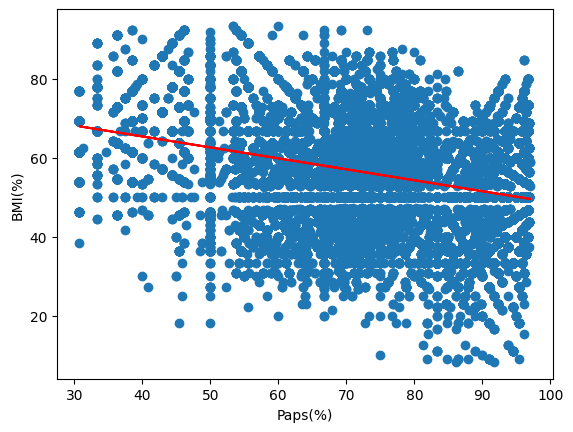

In [7]:
from scipy import stats
import matplotlib.pyplot as plt

# 데이터 준비
x = df_result['평균']
y = df_result['BMI(kg/㎡)']

# DataFrame으로 결합하여 결측치 제거
df = pd.DataFrame({'x': x, 'y': y})
df.dropna(inplace=True)

# 결측치 제거 후 x, y 다시 할당
x = df['x']
y = df['y']

# scipy를 사용한 선형 회귀
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# 선형 회귀 직선 플로팅
plt.scatter(x, y)
plt.plot(x, slope*x + intercept, 'r', label='fitted line')

# 라벨 추가
plt.xlabel('Paps(%)')
plt.ylabel('BMI(%)')

# 그래프 표시
plt.show()

In [8]:
# 상관관계 표시
correlation = df_result.corr(method = 'spearman')
correlation

,평균,BMI(kg/㎡)
평균,1.000000,-0.326448
BMI(kg/㎡),-0.326448,1.000000
